<a href="https://colab.research.google.com/github/BorisOskolkov/MLcourse/blob/main/asng01/A01_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Ipython script should be in the folder.


Made by Boris Oskolkov for Assignment01 (CS5783)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import string
from IPython.display import Image

 --------- start of a first problem --------------

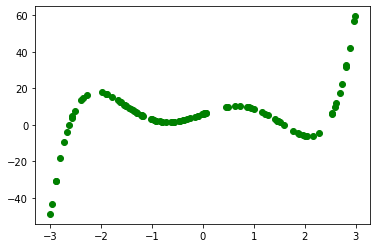

In [16]:
#plot training data
x_data=np.load('x_train.npy')
y_data=np.load('y_train.npy')
plt.plot(x_data, y_data, 'go')

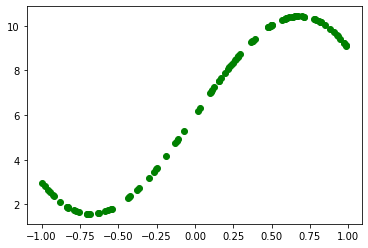

In [20]:
#plotting test data
x_test=np.load('x_test.npy')
y_test=np.load('y_test.npy')
plt.plot(x_test, y_test, 'go')

Answering to the first question, relationship between one variable and output is non-linear. We need to add some non-linearity to the model. I believe that we should use cubic and sin inside a polynomial basis function for training.

In [14]:
def partial_derivative(X_batch, y_batch, m_stat):

  y_pred = X_batch @ m_stat
  n = len(X_batch)

  df_dm =  (-2/n) * (X_batch.T @ (y_batch - y_pred))
  df_dm = df_dm.reshape(len(df_dm),-1)

  return df_dm

def mean_squared_error(X,y,m_stat):
  y_pred = X @ m_stat
  mse = np.sum(((y_pred - y)**2),axis = 0) / len(X)
  
  return mse

def training(X, y, batch_size, lr, epochs):
  
  for epoch in range(epochs):

    #random initial statistics
    if epoch == 0:
      m_stat = np.random.rand(X.shape[1],1)

    #shuffle X and y using same permutation
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    X = X[indices]
    y = y[indices]

    #store comulative derivative
    cumulative_derivative = np.zeros((X.shape[1],1))

    for batch in range(len(X)//batch_size):
      start = batch*batch_size
      stop = (batch*batch_size) + batch_size

      X_batch = X[start:stop]
      y_batch = y[start:stop]
      
      #derivative
      cumulative_derivative = cumulative_derivative + partial_derivative(X_batch, y_batch, m_stat)

      #updating rule
      m_stat = m_stat - (lr*cumulative_derivative)
    
    print(f"epoch: {epoch} ----> MSE: {mean_squared_error(X,y,m_stat)}")
      
  return m_stat

In [63]:
basis = np.hstack([np.ones((x_data.shape[0], 1)), x_data, x_data**3])

In [74]:
theta = np.random.randn(100,3)
prediction = np.sum(theta.T.dot(basis), axis=1)



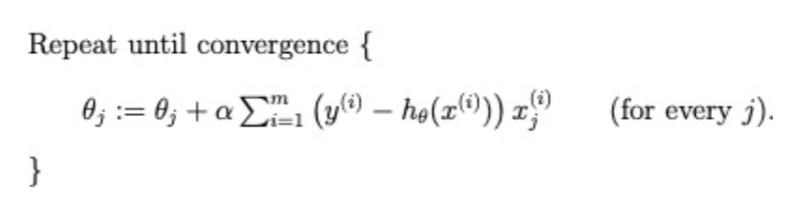